In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from math import comb

In [127]:
def maj_vote_prob(c, p):
    
    if c%2 != 0:
        i = math.ceil(c / 2)
    else:
        i = int(c/2 + 1)

    i = math.floor(c/2+1)
    
    probability = 0

    for j in range(i, c+1):

        probability += comb(c, j) * math.pow(p, j)*math.pow(1-p, c-j)

    return probability

In [128]:
p_students = maj_vote_prob(31,0.6)
print(f"p(majority medical students) = {p_students}")

p(majority medical students) = 0.8716182723048189


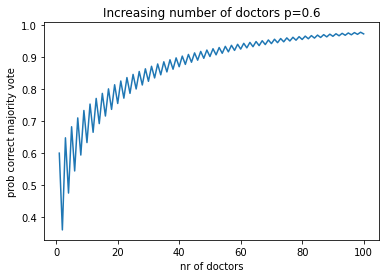

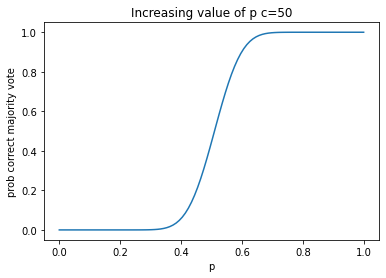

In [129]:
doctors = np.linspace(1,100,100,dtype=np.int)
p = 0.6
prob = [maj_vote_prob(doctor, p) for doctor in doctors]
plt.plot(doctors, prob)
plt.title(f"Increasing number of doctors p={p}")
plt.xlabel("nr of doctors")
plt.ylabel("prob correct majority vote")
plt.show()

ps = np.linspace(0,1,100,dtype=np.float)
doctor = 50
prob = [maj_vote_prob(doctor, p) for p in ps]
plt.plot(ps, prob)
plt.title(f"Increasing value of p c={doctor}")
plt.xlabel("p")
plt.ylabel("prob correct majority vote")
plt.show()

In [123]:
def maj_vote(w, c, p1, p2):
    
    v = w+c #total number of votes
    
    # majority number
    if v%2 != 0:
        m = math.ceil(c / 2)
    else:
        m = int(c/2 + 1)
    
    m = math.floor((w+c)/2 +1)
    
    m2 = max(m-w, 0) #nr needed from weak if strong correct
     
    prob = 0
    
    
    for i in range(m2, c+1):
        prob += p1 * comb(c,i)* math.pow(p2,i)*math.pow(1-p2, c-i)
    for i in range(m, c+1):
        prob += (1-p1) * comb(c,i) * math.pow(p2,i)*math.pow(1-p2, c-i)
    
    return prob

In [131]:
maj_vote(1, 10, 0.75, 0.6)

0.7835968512

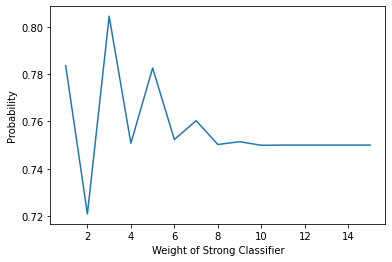

In [133]:
strong_votes = np.linspace(1,15,15,dtype=np.int)
prob = [maj_vote(x, 10, 0.75, 0.6) for x in strong_votes]

plt.plot(strong_votes, prob)
plt.xlabel('Weight of Strong Classifier')
plt.ylabel('Probability')
plt.show()

In [8]:

def ada_boost(errors):

    alpha_m = np.log((1-errors)/errors)
    return alpha_m

def ada_boost_d(error):
    weight = 1
    alpha_m = np.log((1-error)/error)
    weight *= math.exp(alpha_m*error)
    return weight

In [9]:
probs = np.array([0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.75])
ada_boost(1- probs)

array([0.40546511, 0.40546511, 0.40546511, 0.40546511, 0.40546511,
       0.40546511, 0.40546511, 0.40546511, 0.40546511, 0.40546511,
       1.09861229])

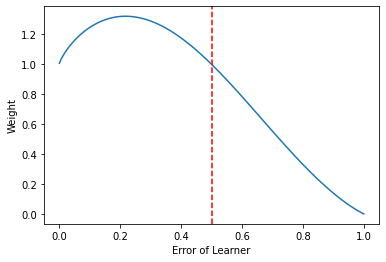

In [11]:
x = np.linspace(0.001, 0.999, 1000)
y = [ada_boost_d(w) for w in x]

plt.figure()
plt.plot(x, y)
plt.xlabel('Error of Learner')
plt.ylabel('Weight')
plt.axvline(x=0.5, color='r', linestyle='--')
plt.show()

In [25]:
from scipy.io import loadmat
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = loadmat("data/wine.mat")

X = data["X"]
y = data["y"].ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))

0.9941860465116279
